In [38]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
import warnings
warnings.filterwarnings(action='ignore')

In [40]:
import matplotlib.font_manager
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

In [7]:
# # 데이터 불러오기
# df_raw = pd.read_csv("/home/piai/python/datazip/C4/bat_process.csv", encoding='cp949')

In [5]:
# df_raw.head()

,lot_id,tray_id,dt_start,cell_id,judge,rta1_cell_no,rta1_box_col,rta1_box_row,rta1_box_dan,hta1_box_col,...,sa3_box_row,sa3_box_dan,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an
0,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10747,양품,10,08열,33연,08단,03열,...,37연,04단,3759.3,5,6.8,4718,37583,94,565,164
1,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10748,양품,7,08열,33연,08단,03열,...,37연,04단,3758.4,5,6.8,4718,37574,94,565,73
2,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10749,양품,19,08열,33연,08단,03열,...,37연,04단,3759,5.1,6.9,4700,37579,91,585,-57
3,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10750,양품,24,08열,33연,08단,03열,...,37연,04단,3759.5,5.1,6.9,4688,37583,93,606,99
4,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10751,양품,17,08열,33연,08단,03열,...,37연,04단,3758.2,5,6.8,4696,37570,91,605,36


In [14]:
# df_hana = df_raw[['cell_id','judge','pc1_imp', 'pc1_voltage_start', 'pc1_curr_end','pc1_box_col','pc1_box_dan','sa1_box_col','sa1_box_row','sa1_box_dan','socv1_ocv']]

In [41]:
df_hana = pd.read_csv("C:/Users/first/Downloads/df_hana.csv", encoding='utf-8')
df_hana.head()

,Unnamed: 0,cell_id,judge,pc1_imp,pc1_voltage_start,pc1_curr_end,pc1_box_col,pc1_box_dan,sa1_box_col,sa1_box_row,sa1_box_dan,socv1_ocv
0,0,CELL-10747,양품,2086,3714,150,12열,01단,09열,42연,01단,3766.1
1,1,CELL-10748,양품,2093,3714,150,12열,01단,09열,42연,01단,3765.2
2,2,CELL-10749,양품,2081,3715,150,12열,01단,09열,42연,01단,3765.9
3,3,CELL-10750,양품,2083,3714,150,12열,01단,09열,42연,01단,3766.4
4,4,CELL-10751,양품,2083,3714,150,12열,01단,09열,42연,01단,3765.0


In [42]:
df_hana = df_hana.iloc[:, 1:]
df_hana

,cell_id,judge,pc1_imp,pc1_voltage_start,pc1_curr_end,pc1_box_col,pc1_box_dan,sa1_box_col,sa1_box_row,sa1_box_dan,socv1_ocv
0,CELL-10747,양품,2086,3714,150,12열,01단,09열,42연,01단,3766.1
1,CELL-10748,양품,2093,3714,150,12열,01단,09열,42연,01단,3765.2
2,CELL-10749,양품,2081,3715,150,12열,01단,09열,42연,01단,3765.9
3,CELL-10750,양품,2083,3714,150,12열,01단,09열,42연,01단,3766.4
4,CELL-10751,양품,2083,3714,150,12열,01단,09열,42연,01단,3765.0
...,...,...,...,...,...,...,...,...,...,...,...
43749,CELL-53649,양품,2137,3714,150,08열,01단,11열,54연,08단,3766.4
43750,CELL-53650,양품,2151,3714,150,08열,01단,11열,54연,08단,3766.3
43751,CELL-53651,양품,2149,3715,150,08열,01단,11열,54연,08단,3767.3
43752,CELL-54355,양품,2160,3714,150,08열,01단,11열,54연,08단,3767.0


## 평균 등

In [43]:
df_hana.describe()

,pc1_imp,pc1_voltage_start,pc1_curr_end,socv1_ocv
count,43754.000000,43754.000000,43754.000000,43754.000000
mean,2130.453856,3715.128994,150.000023,3766.197561
std,41.673686,1.489508,0.004781,0.895669
min,1992.000000,3709.000000,150.000000,3761.500000
25%,2101.000000,3714.000000,150.000000,3765.600000
50%,2128.000000,3715.000000,150.000000,3766.200000
75%,2159.000000,3716.000000,150.000000,3766.800000
max,2278.000000,3723.000000,151.000000,3770.800000


## 결측치 확인

In [44]:
# 결측치 확인 => 없음
df_hana.isnull().sum()

cell_id              0
judge                0
pc1_imp              0
pc1_voltage_start    0
pc1_curr_end         0
pc1_box_col          0
pc1_box_dan          0
sa1_box_col          0
sa1_box_row          0
sa1_box_dan          0
socv1_ocv            0
dtype: int64

## 이상치 확인

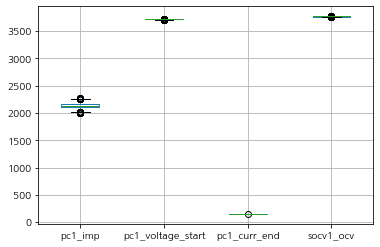

In [45]:
df_hana.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001931D78BCC8>,
      dtype=object)

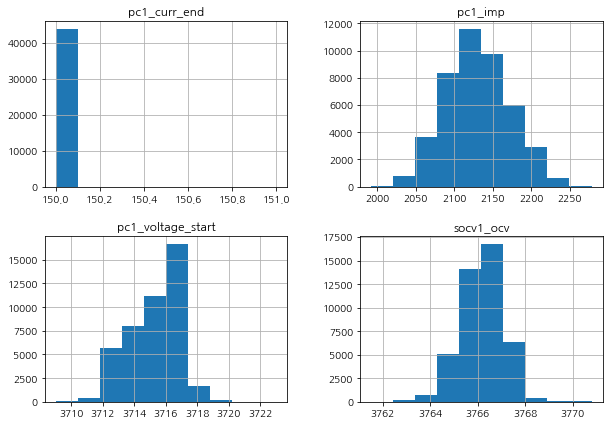

In [46]:
df_hana.hist(figsize = (10, 7))

## Tat

In [60]:
tat_hana = pd.read_csv("C:/Users/first/Downloads/tat_hana.csv", encoding='euc-kr')
tat_hana.head()

,lot_id,tray_id,dt_start,cell_id,judge,pc1_tat,sa1_tat,socv1_tat
0,LOT-144,TRAY-2754,12-17-2021 오전 10:17:10,CELL-53580,양품,290,43027,5
1,LOT-144,TRAY-2755,12-17-2021 오전 10:32:30,CELL-53656,양품,290,43027,5
2,LOT-144,TRAY-2755,12-17-2021 오전 10:32:30,CELL-53657,양품,290,43027,5
3,LOT-144,TRAY-2755,12-17-2021 오전 10:32:30,CELL-53658,양품,290,43027,5
4,LOT-144,TRAY-2755,12-17-2021 오전 10:32:30,CELL-53659,양품,290,43027,5


In [61]:
tat_hana.describe()

,pc1_tat,sa1_tat,socv1_tat
count,43754.000000,43754.000000,43754.000000
mean,289.211272,46280.070074,5.510902
std,4.773940,4543.917972,1.639576
min,259.000000,18379.000000,4.000000
25%,290.000000,42939.000000,5.000000
50%,291.000000,43100.000000,5.000000
75%,291.000000,50805.000000,5.000000
max,343.000000,61506.000000,14.000000


In [62]:
tat_hana.isnull().sum()

lot_id       0
tray_id      0
dt_start     0
cell_id      0
judge        0
pc1_tat      0
sa1_tat      0
socv1_tat    0
dtype: int64

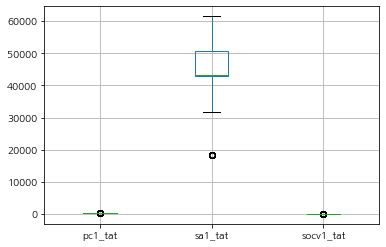

In [64]:
tat_hana.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001931DA949C8>,
      dtype=object)

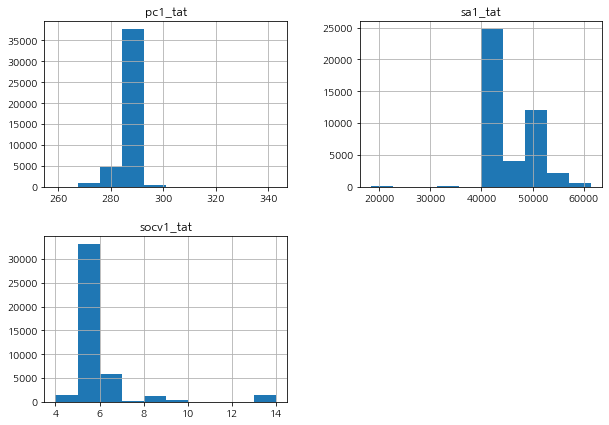

In [58]:
tat_hana.hist(figsize = (10, 7))

In [18]:
df_hana_bad  = df_hana[df_hana['judge'] == '불량']

In [20]:
df_hana_bad.describe()

,pc1_imp,pc1_voltage_start,pc1_curr_end,socv1_ocv
count,1375.000000,1375.000000,1375.000000,1375.000000
mean,2153.078545,3715.046545,150.000727,3766.373309
std,38.587558,1.626523,0.026968,0.881300
min,2010.000000,3710.000000,150.000000,3762.900000
25%,2135.000000,3714.000000,150.000000,3765.900000
50%,2151.000000,3715.000000,150.000000,3766.400000
75%,2178.000000,3716.000000,150.000000,3767.000000
max,2245.000000,3720.000000,151.000000,3770.300000


<AxesSubplot:>

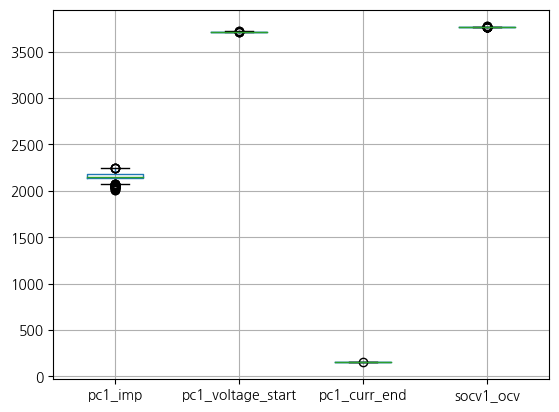

In [21]:
df_hana_bad.boxplot()

cell_id              0
judge                0
pc1_imp              0
pc1_voltage_start    0
pc1_curr_end         0
pc1_box_col          0
pc1_box_dan          0
sa1_box_col          0
sa1_box_row          0
sa1_box_dan          0
socv1_ocv            0
dtype: int64

array([[<AxesSubplot:title={'center':'pc1_imp'}>,
        <AxesSubplot:title={'center':'pc1_voltage_start'}>],
       [<AxesSubplot:title={'center':'pc1_curr_end'}>,
        <AxesSubplot:title={'center':'socv1_ocv'}>]], dtype=object)

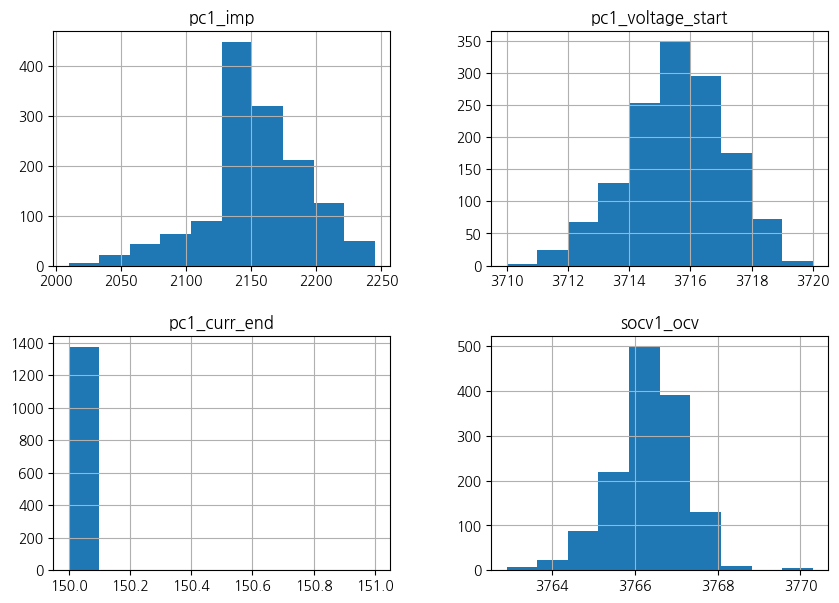

In [26]:
df_hana_bad.hist(figsize = (10, 7))

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

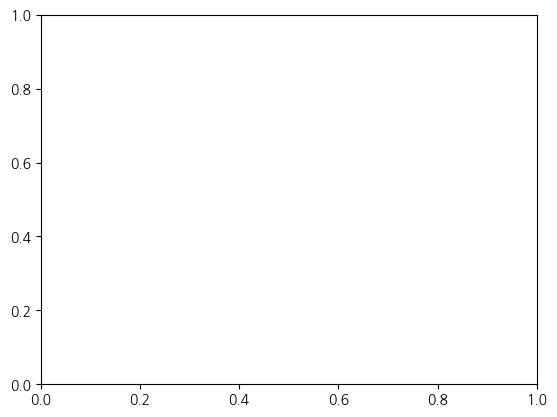

In [29]:
df_hana_bad.boxplot(column="judge", by="pc1_imp")